#### Loading the dataset for One time Entertainment licenses into a dataframe
The dataset is being loaded and we are converting license dates into proper datetime format

In [1]:
import pandas as pd

# Load the dataset
file_path = 'licensing_board.csv'
license_data = pd.read_csv(file_path)

# Data Preprocessing
license_data['issued'] = pd.to_datetime(license_data['issued'], errors='coerce')
license_data['expires'] = pd.to_datetime(license_data['expires'], errors='coerce')

In [2]:
license_data.head()

,license_num,historicallicensenum,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,applicant,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,LB-576027,NaN,Active,Common Victualler,Common Victualler,NaT,NaT,"Levain Bakery Cookie Company, LLC",Levain Bakery,NaN,...,"Levain Bakery Cookie Company, LLC",Arlene De La Cruz,(917)242-6602,NaN,107- Seaport BL,Boston,MA,2210,779063.469690,2.953316e+06
1,LB-577941,NaN,Active,Common Victualler,Common Victualler,NaT,NaT,Dudley Food Inc,Royal Fried Chicken,NaN,...,Dudley Food Inc,Anwar Shah,(617)442-6927,NaN,2360- Washington ST,Roxbury,MA,2119,768536.769615,2.945323e+06
2,LB-480459,NaN,Active,Common Victualler,Common Victualler,NaT,NaT,"Fruit Tea MA 2, Inc.",Yifang Taiwan Fruit Tea,NaN,...,"Fruit Tea MA2, Inc.",Emily Chen,NaN,NaN,14- Brighton AV,Allston,MA,2134,757304.625740,2.953531e+06
3,LB-578793,NaN,Active,Common Victualler,Common Victualler,NaT,2024-09-01,Star Fish Egleston LLC,Star Fish Market,NaN,...,Star Fish Egleston LLC,Yonatan Pena,(617)524-8711,NaN,3089- Washington ST,Roxbury,MA,2119,764601.245990,2.940266e+06
4,LB-574901,NaN,Active,Common Victualler,Common Victualler,NaT,NaT,Papa ERDR Dorchester LLC,Papa Johns,Hours Operation 10 00 AM to 12 Sunday Thursday...,...,Papa ERDR Dorchester LLC,Charles Tabb,(732)763-5902,NaN,1501- Dorchester AV,Dorchester,MA,2122,775049.740184,2.934449e+06


##### Looking for additional information on the data for preprocessing

In [3]:
license_data.info

<bound method DataFrame.info of      license_num historicallicensenum  status   license_category  \
0      LB-576027                  NaN  Active  Common Victualler   
1      LB-577941                  NaN  Active  Common Victualler   
2      LB-480459                  NaN  Active  Common Victualler   
3      LB-578793                  NaN  Active  Common Victualler   
4      LB-574901                  NaN  Active  Common Victualler   
...          ...                  ...     ...                ...   
3444   LB-107560                  NaN  Active               Misc   
3445   LB-107538                  NaN  Active               Misc   
3446   LB-108942                  NaN  Active  Common Victualler   
3447   LB-109265                  NaN  Active  Common Victualler   
3448   LB-107749                  NaN  Active  Common Victualler   

           license_type     issued    expires  \
0     Common Victualler        NaT        NaT   
1     Common Victualler        NaT        NaT   
2   

In [4]:
license_data.columns

Index(['license_num', 'historicallicensenum', 'status', 'license_category',
       'license_type', 'issued', 'expires', 'business_name', 'dba_name',
       'comments', 'location_comments', 'opening', 'closing', 'patronsout',
       'capacity', 'applicant', 'manager', 'day_phone', 'evening_phone',
       'address', 'city', 'state', 'zip', 'gpsx', 'gpsy'],
      dtype='object')

#### Measuring the vibrancy of the licensing data
The function computes the vibrancy score for each city in the dataset. The vibrancy score is calculated using three components:
1. Active Licenses: The count of licenses with a status of "Active".
2. License Diversity: The number of unique license types in a city.
3. Average Capacity: The mean capacity of establishments in the city

In [5]:
# Measure of Vibrancy
def calculate_vibrancy(data):
    # Grouping by neighborhood (city) and aggregating data
    data['city_normalized'] = data['city'].str.title()
    vibrancy = (
        data.groupby('city_normalized')
        .agg(
            active_licenses=('status', lambda x: (x == 'Active').sum()),
            license_diversity=('license_type', 'nunique'),
            avg_capacity=('capacity', 'mean'),
        )
        .reset_index()
    )
    
    # Normalizing and creating a composite vibrancy score
    vibrancy['vibrancy_score'] = (
        vibrancy['active_licenses'] +
        vibrancy['license_diversity'] * 2 +  # Weighted more for diversity
        vibrancy['avg_capacity'] / 10       # Scaled down
    )
    return vibrancy

# Calculate Vibrancy
vibrancy_data = calculate_vibrancy(license_data)

In [6]:
vibrancy_data

,city_normalized,active_licenses,license_diversity,avg_capacity,vibrancy_score
0,Allston,162,11,46.537037,188.653704
1,Boston,1740,24,231.681034,1811.168103
2,Boston/Beacon Hill,1,1,19.000000,4.900000
3,Brighton,152,16,71.217105,191.121711
4,Charlestown,54,12,76.055556,85.605556
5,Chestnut Hill,7,4,48.285714,19.828571
6,Dorchester,313,19,65.900958,357.590096
7,Downtown/Financial District,1,1,18.000000,4.800000
8,East Boston,254,21,211.133858,317.113386
9,Hyde Park,55,14,41.981818,87.198182


##### Saving the resulting dataframe into a csv file

In [7]:
vibrancy_data.to_csv('licensing_board_data_boston.csv')

##### Plotting the vibrancy metrics

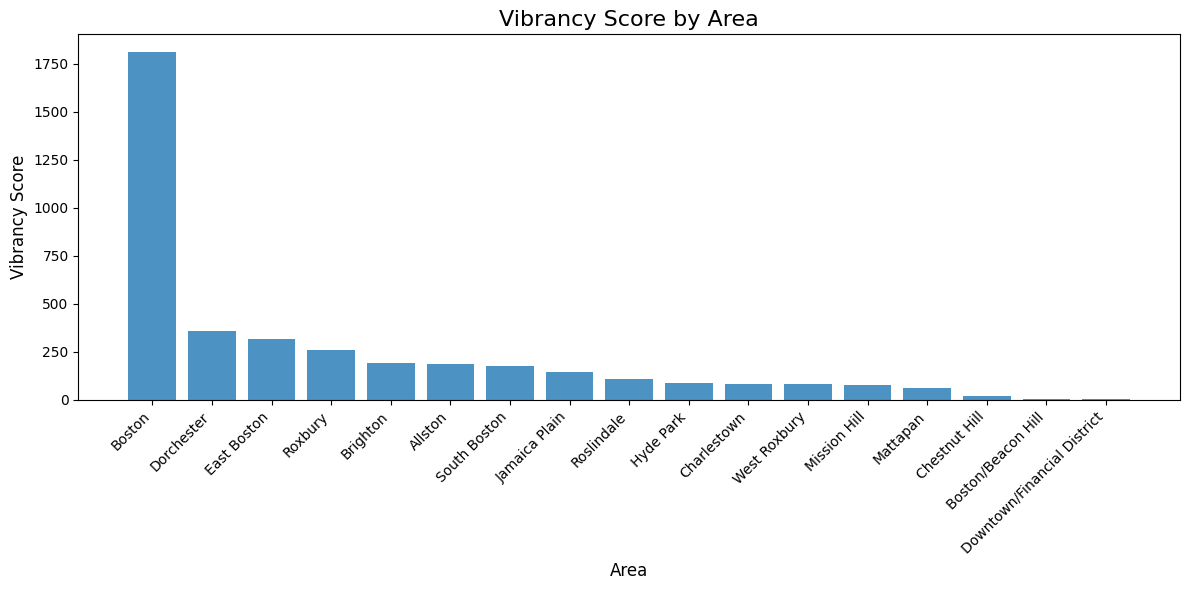

In [8]:
import matplotlib.pyplot as plt

vibrancy_data_sorted = vibrancy_data.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted['city_normalized'], vibrancy_data_sorted['vibrancy_score'], alpha=0.8)
plt.title('Vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart shows the Vibrancy Score by Area, with Boston far surpassing other neighborhoods, highlighting its significant business activity and diversity. Dorchester follows as the second most vibrant area, with East Boston and Roxbury scoring moderately. Areas like Brighton, Allston, and South Boston show mid-level vibrancy, while neighborhoods such as Chestnut Hill, Mission Hill, and Downtown/Financial District have much lower vibrancy scores, reflecting limited business activity or diversity.

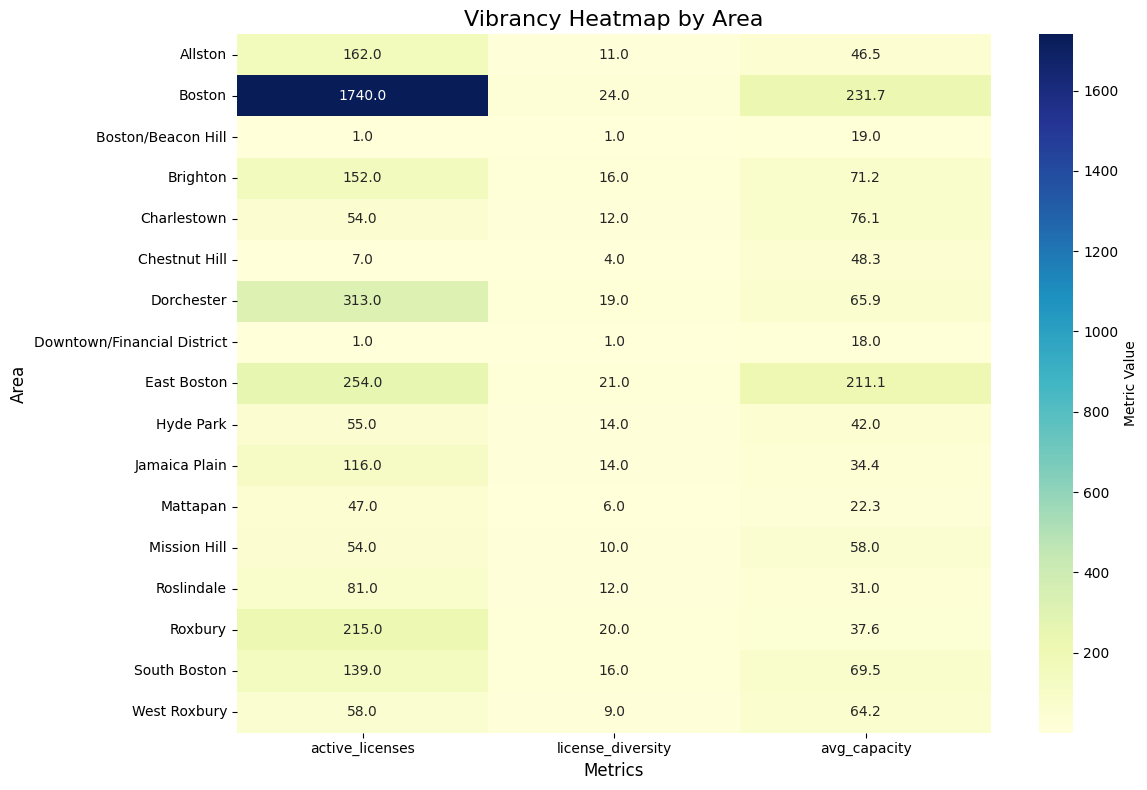

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = vibrancy_data.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap compares vibrancy metrics (active licenses, license diversity, and average capacity) across areas. Boston leads with the highest values across all metrics, reflecting strong business activity and diversity. Dorchester and East Boston follow with substantial active licenses and diversity, while East Boston also has a high average capacity. Roxbury and Brighton show moderate vibrancy, driven by active licenses and diversity. Areas like Chestnut Hill, Downtown/Financial District, and Mattapan exhibit low scores across all metrics, indicating limited economic activity and diversity.

### Filtering out for only district 7

Using a predefined list of census tract IDs that have been identified by us earlier we are filtering relevant areas from a GeoJSON file containing Boston census tract data. Then, license data is converted into a GeoDataFrame with geometry points derived from GPS coordinates (gpsx, gpsy).The filtered census tracts' CRS is updated to match the license GeoDataFrame's CRS for compatibility. After that a spatial join is performed to associate licenses with the filtered census tracts where they intersect.

In [10]:
import geopandas as gpd
from shapely.geometry import Point

# List of census tracts to filter
census_tracts_list = [
    '25025080601', '25025010403', '25025070700', '25025010300', '25025981100',
    '25025120201', '25025980300', '25025010404', '25025010405', '25025080100',
    '25025120301', '25025071101', '25025091300', '25025010500', '25025110105',
    '25025010206', '25025081301', '25025081302', '25025070502', '25025082100',
    '25025010600', '25025070600', '25025080300', '25025080401', '25025080500',
    '25025080801', '25025080900', '25025081400', '25025081500', '25025081700',
    '25025081800', '25025081900', '25025082000', '25025090100', '25025090200',
    '25025090300', '25025090400', '25025090600', '25025090700', '25025091400',
    '25025092400', '25025070902', '25025070802', '25025070801', '25025070901'
]

boston = gpd.read_file("C:/Users/ishan/Desktop/ISHANAY/BU docs/Fall 2024/CDS DS701(Tools for DS)/Project district 7/Boston_census_tract.geojson")

# Filtering `boston` using the list of census tracts
filtered_d7 = boston[boston['geoid20'].isin(census_tracts_list)]  

# Converting License Data to GeoDataFrame
license_data['geometry'] = license_data.apply(lambda row: Point(row['gpsx'], row['gpsy']), axis=1)
license_gdf = gpd.GeoDataFrame(license_data, geometry='geometry', crs="EPSG:2249")
filtered_d7 = filtered_d7.to_crs(license_gdf.crs)

# Spatial Join: Map licenses to the filtered census tracts
filtered_licenses = gpd.sjoin(license_gdf, filtered_d7, how="inner", predicate="intersects")
filtered_d7 = filtered_licenses.drop(columns='geometry')

In [11]:
filtered_d7.head()

,license_num,historicallicensenum,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,statefp20,tractce20,intptlat20,name20,funcstat20,intptlon20,mtfcc20,aland20,awater20,objectid
1,LB-577941,NaN,Active,Common Victualler,Common Victualler,NaT,NaT,Dudley Food Inc,Royal Fried Chicken,NaN,...,25,080601,+42.3333769,806.01,S,-071.0880443,G5020,561665,0,7
3,LB-578793,NaN,Active,Common Victualler,Common Victualler,NaT,2024-09-01,Star Fish Egleston LLC,Star Fish Market,NaN,...,25,120301,+42.3126892,1203.01,S,-071.1019405,G5020,657613,0,72
10,LB-536889,NaN,Active,Misc,Lodging Houses (Frat/Dorm),NaT,NaT,NaN,NaN,NaN,...,25,070902,+42.3388070,709.02,S,-071.0774493,G5020,110873,0,199
19,LB-578795,NaN,Active,Common Victualler,Common Victualler,2024-11-04,2024-12-31,Prietos Empanadas Corp,Prietos Empanadas,NaN,...,25,082100,+42.3094485,821,S,-071.0872292,G5020,370577,0,124
20,LB-577742,NaN,Active,Common Victualler,Common Victualler,2024-11-01,2024-12-31,C & E RESTAURANT Inc,Claudio & Estela Restaurant,NaN,...,25,090100,+42.3023758,901,S,-071.0820195,G5020,446964,0,159


##### Looking for more information on district 7 data

In [12]:
filtered_d7.info

<bound method DataFrame.info of      license_num historicallicensenum  status   license_category  \
1      LB-577941                  NaN  Active  Common Victualler   
3      LB-578793                  NaN  Active  Common Victualler   
10     LB-536889                  NaN  Active               Misc   
19     LB-578795                  NaN  Active  Common Victualler   
20     LB-577742                  NaN  Active  Common Victualler   
...          ...                  ...     ...                ...   
3411   LB-100759            CVICT1807  Active  Common Victualler   
3413    LB-99954            CVICT0153  Active  Common Victualler   
3414    LB-99885            CVICT0024  Active  Common Victualler   
3427   LB-101548            DRMTY0350  Active               Misc   
3428   LB-101515            DRMTY0309  Active               Misc   

                    license_type     issued    expires  \
1              Common Victualler        NaT        NaT   
3              Common Victualler   

In [13]:
vibrancy_data_d7 = calculate_vibrancy(filtered_d7)

In [14]:
vibrancy_data_d7

,city_normalized,active_licenses,license_diversity,avg_capacity,vibrancy_score
0,Boston,268,15,472.559701,345.255970
1,Dorchester,89,14,64.539326,123.453933
2,Jamaica Plain,35,11,41.400000,61.140000
3,Mission Hill,43,9,69.534884,67.953488
4,Roxbury,161,17,30.950311,198.095031


##### Saving district 7 data into CSV

In [15]:
vibrancy_data_d7.to_csv('licensing_board_data_d7.csv')

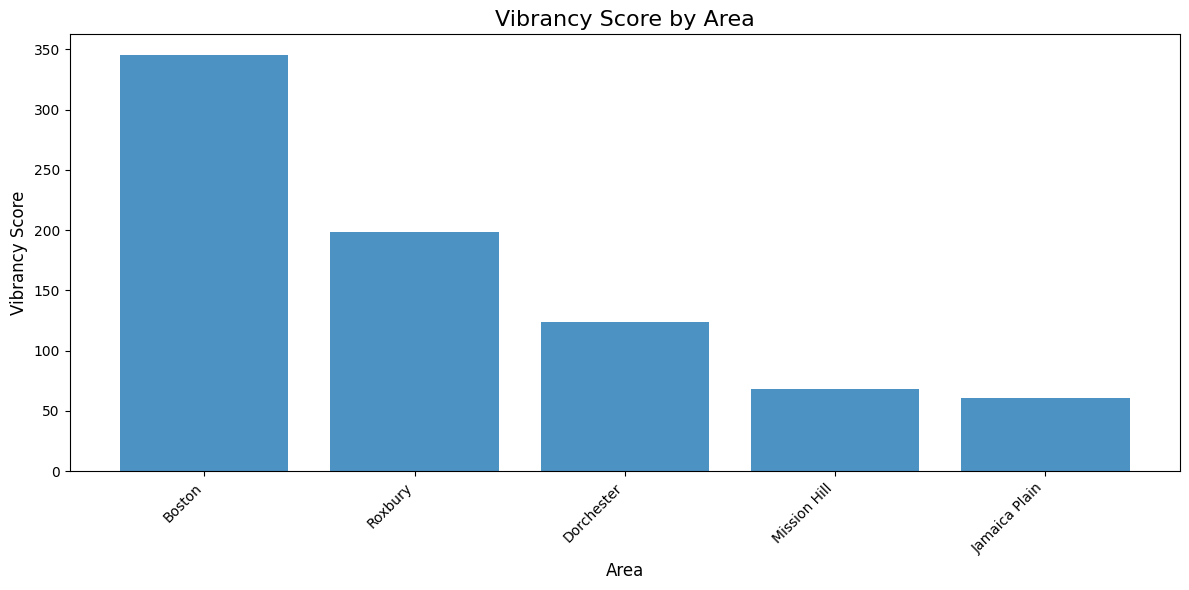

In [16]:
import matplotlib.pyplot as plt

vibrancy_data_sorted_d7 = vibrancy_data_d7.sort_values(by='vibrancy_score', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(vibrancy_data_sorted_d7['city_normalized'], vibrancy_data_sorted_d7['vibrancy_score'], alpha=0.8)
plt.title('Vibrancy Score by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Vibrancy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart highlights the Vibrancy Score by Area for District 7 neighborhoods. Boston leads with the highest score, reflecting its dominant business activity and diversity. Roxbury and Dorchester follow with moderate scores, indicating notable vibrancy. Mission Hill and Jamaica Plain show significantly lower scores, suggesting comparatively limited business activity and diversity in these areas.

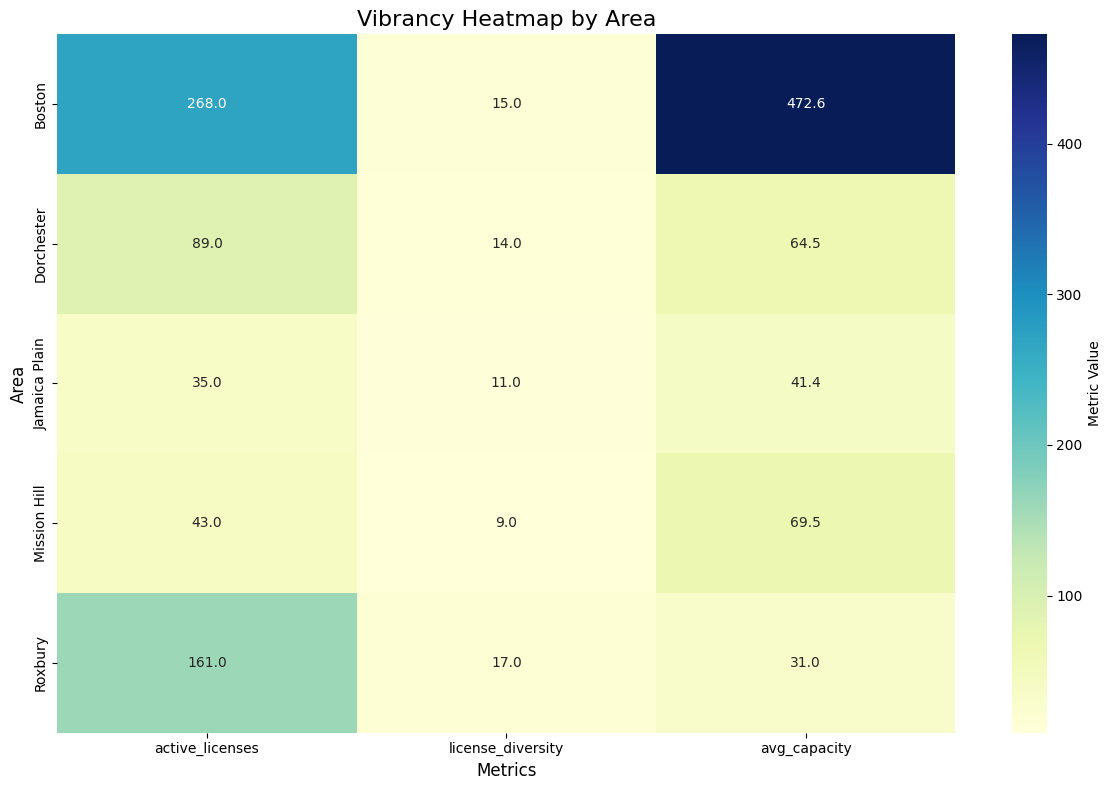

In [17]:
heatmap_data_d7 = vibrancy_data_d7.set_index('city_normalized').drop(columns=['vibrancy_score'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_d7, 
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Metric Value'}
)
plt.title('Vibrancy Heatmap by Area', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap compares vibrancy metrics (active licenses, license diversity, and average capacity) across Dsitrict 7. Boston leads with the highest values in all metrics, particularly average capacity, reflecting strong business diversity and scale. Roxbury shows significant vibrancy driven by active licenses and diversity. Dorchester exhibits moderate vibrancy across all metrics. Jamaica Plain and Mission Hill display lower vibrancy, with fewer active licenses and reduced diversity, indicating limited economic activity in these areas.